# Description

Reads $k_{\mathrm{max}}$ analyses and plot results.

# Modules loading

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ccc import conf
from ccc.coef import ccc

# Settings

# Paths

In [2]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [3]:
INPUT_DIR = conf.RESULTS_DIR / "k_max_test"
INPUT_DIR.mkdir(parents=True, exist_ok=True)
display(INPUT_DIR)

PosixPath('/opt/data/results/k_max_test')

In [4]:
INPUT_FILE = INPUT_DIR / "k_max-results.pkl"
display(INPUT_FILE)

PosixPath('/opt/data/results/k_max_test/k_max-results.pkl')

In [5]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "misc"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/misc')

# Load data

In [6]:
results = pd.read_pickle(INPUT_FILE)

In [7]:
results.shape

(33, 4)

In [8]:
results.head()

,data_size,k_max,k_max_as_n_fraction,coef
0,200.0,2.0,0.01,0.043594
1,200.0,10.0,0.05,0.043594
2,200.0,24.0,0.12,0.043594
3,200.0,46.0,0.23,0.043594
4,200.0,68.0,0.34,0.043594


# Stats

In [9]:
results.describe()

,data_size,k_max,k_max_as_n_fraction,coef
count,33.000000,33.000000,33.000000,33.000000
mean,866.666667,395.515152,0.458653,0.019595
std,690.410506,489.003842,0.337793,0.018079
min,200.000000,2.000000,0.001111,0.001045
25%,200.000000,68.000000,0.120000,0.003200
50%,600.000000,200.000000,0.445000,0.010162
75%,1800.000000,533.000000,0.777778,0.043594
max,1800.000000,1800.000000,1.000000,0.043594


# Change data types

In [10]:
results.dtypes

data_size              float64
k_max                  float64
k_max_as_n_fraction    float64
coef                   float64
dtype: object

In [11]:
results["data_size"] = results["data_size"].astype(int)
results["k_max"] = results["k_max"].astype(int)

In [12]:
results.dtypes

data_size                int64
k_max                    int64
k_max_as_n_fraction    float64
coef                   float64
dtype: object

# Plot

In [13]:
sns.set(rc={"figure.figsize": (12, 8)})

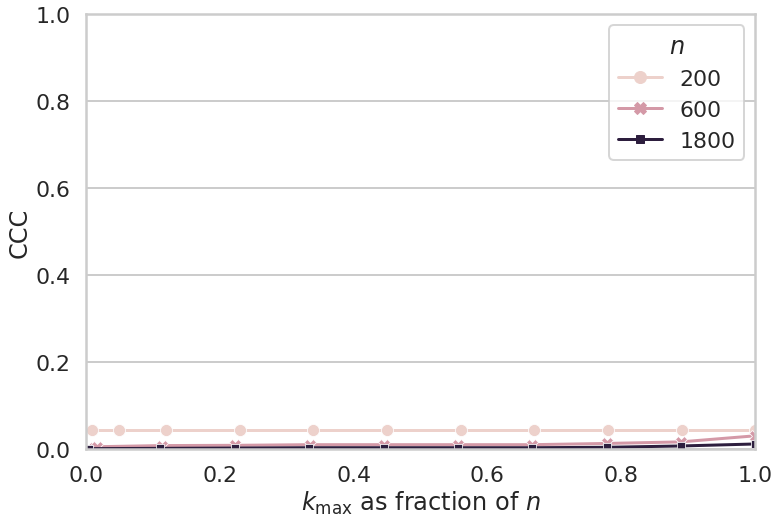

In [14]:
with sns.axes_style("whitegrid"), sns.plotting_context("poster"):
    # fig, axes = plt.subplots(1, 2, figsize=(24, 8))

    common_params = {
        "data": results,
        "x": "k_max_as_n_fraction",
        "y": "coef",
        "hue": "data_size",
        "style": "data_size",
        "markers": True,
        "dashes": False,
    }

    ax = sns.lineplot(
        # ax=axes[0],
        **common_params,
    )
    ax.set(xlim=(0, 1), ylim=(0, 1.0))
    ax.set(ylabel="CCC", xlabel="$k_{\mathrm{max}}$ as fraction of $n$")
    ax.xaxis.grid(False)
    # sns.move_legend(ax, 0, title="$n$")
    ax.get_legend().set_title("$n$")

    plt.savefig(
        OUTPUT_FIGURE_DIR / "constant_baseline-k_max.svg",
        bbox_inches="tight",
        facecolor="white",
    )

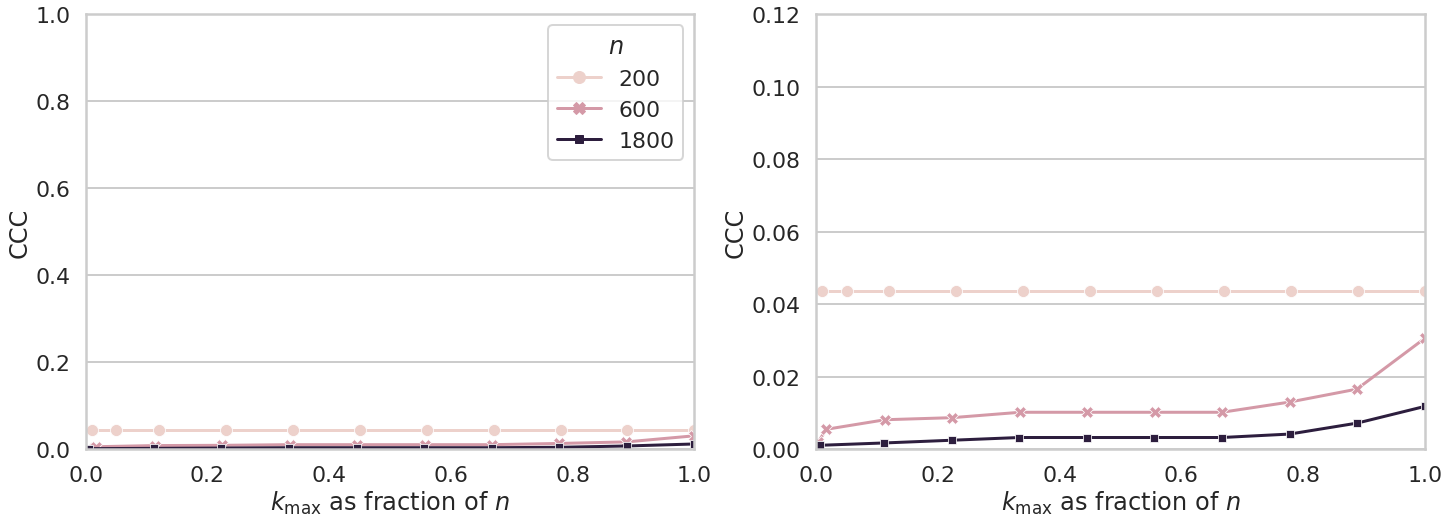

In [15]:
with sns.axes_style("whitegrid"), sns.plotting_context("poster"):
    fig, axes = plt.subplots(1, 2, figsize=(24, 8))

    common_params = {
        "data": results,
        "x": "k_max_as_n_fraction",
        "y": "coef",
        "hue": "data_size",
        "style": "data_size",
        "markers": True,
        "dashes": False,
    }

    ax = sns.lineplot(
        ax=axes[0],
        **common_params,
    )
    ax.set(xlim=(0, 1), ylim=(0, 1.0))
    ax.get_legend().set_title("$n$")

    ax = sns.lineplot(
        ax=axes[1],
        legend=False,
        **common_params,
    )
    ax.set(xlim=(0, 1), ylim=(0, 0.12))

    for ax in axes:
        ax.set(ylabel="CCC", xlabel="$k_{\mathrm{max}}$ as fraction of $n$")
        ax.xaxis.grid(False)

    plt.savefig(
        OUTPUT_FIGURE_DIR / "constant_baseline-k_max-ccc_scaled.svg",
        bbox_inches="tight",
        facecolor="white",
    )